In [1]:
pip install tensorflow matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


# Estudio con una red neuronal convolucional

## Prueba 1

Para empezar decidimos utilizar 'Data Augmentation'. A pesar de tener un gran volumen de imágenes, queremos asegurarnos de que disponemos de 
variabilidad en el conjunto de entrenamiento, para así poder mejorar la capacidad del modelo para generalizar, y así aumentar la precisión. 

Utilizando todas las fotos que tenemos, cogeremos el 80% para entrenamiento y el 20% para validación. 

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

In [4]:
# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.
# Creamos un generador de datos para aumentar las imágenes del conjunto de entrenamiento
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, #Rota imagen 40 grados
    width_shift_range=0.2, #Desplaza horizontalmente hasta un 20%
    height_shift_range=0.2, #Desplaza verticalmente hasta un 20%
    shear_range=0.2, #Aplica corte hasta un rango de 0.2
    zoom_range=0.2,  #Hacer zoom hasta un 20%
    horizontal_flip=True, #Voltear imágenes horizontalmente
    fill_mode='nearest',  #Rellenar los píxeles con el más cercano
    validation_split = 0.2 # Dividimos los datos en 80% entrenamiento y un 20% de validación
)

#### Rescale: 
Todas las imágenes se reescalan dividiendo los valores de los píxeles por 255. Esto convierte los valores de los píxeles de un rango de 0-255 a un rango de 0-1, lo cual es más manejable para la red neuronal. Los valores de los píxeles en las imágenes generalmente se representan en un rango de 0 a 255 para cada canal de color (rojo, verde, azul) en una imagen RGB. Las redes neuronales funcionan mejor cuando los datos de entrada tienen valores en un rango pequeño y consistente, típicamente entre 0 y 1. Dividir por 255 convierte los valores de los píxeles de su rango original (0-255) a un rango de 0 a 1. Esto se conoce como normalización.

#### Augmentation: 
Técnicas como rotación, desplazamiento, zoom y volteo horizontal se aplican a las imágenes de entrenamiento para crear variaciones adicionales de las mismas imágenes. Esto ayuda a la red a generalizar mejor al aprender patrones más robustos. 

#### ImageDataGenerator: 
Realiza aumentos de datos en tiempo real durante el entrenamiento, creando variaciones de las imágenes existentes en cada lote. Esto significa que los generadores de datos siguen encontrando la misma cantidad de imágenes y clases, pero cada vez que una imagen es procesada, puede aparecer de forma diferente debido a las transformaciones aplicadas.

In [5]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


#### Flow from Directory: 
Esta función carga las imágenes desde un directorio, las preprocesa y las convierte en lotes que se pueden alimentar a la red neuronal durante el entrenamiento.

In [6]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


Vamos a construir una red neuronal convolucional (CNN), que es especialmente adecuada para procesar y clasificar imágenes. La estructura básica de una CNN incluye capas de convolución y capas de pooling seguidas por capas completamente conectadas (fully connected).

#### Capas de Convolución (Conv2D): 
Estas capas aplican filtros a la imagen de entrada para detectar características como bordes, texturas, etc. Cada filtro genera un mapa de características. Cada filtro realiza una operación de convolución sobre la imagen, aplicando un kernel (una matriz de pesos) que se desplaza sobre la imagen, multiplicando los valores de los píxeles de la imagen por los valores del kernel y sumando el resultado para obtener una única activación. Estas activaciones forman un mapa de características.

#### Capas de Pooling (MaxPooling2D): 
Estas capas reducen la dimensionalidad de los mapas de características generados por las capas de convolución, lo que ayuda a reducir la carga computacional y la posibilidad de sobreajuste.

#### Capa Densa (Dense): 
Estas son capas completamente conectadas que se usan al final para clasificar las imágenes basándose en las características extraídas por las capas convolucionales.

#### Función de Activación: 
La función 'relu' (Rectified Linear Unit) introduce no linealidad en el modelo, lo cual es crucial para aprender relaciones complejas. La última capa usa 'softmax' para convertir las salidas en probabilidades de cada clase.

In [24]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

Conv2D es una capa de convolución bidimensional que aplica filtros convolucionales sobre una entrada 2D (normalmente una imagen). Se puede ver como en estas capas el tercer valor va aumentando ya que se trata de la profundidad o el número de filtros (también conocido como canales), tiende a aumentar a medida que la red se profundiza. La aplicación en varias capas a lo largo de la red permite una reducción gradual del tamaño espacial de los mapas de características, mientras se incrementa la profundidad (número de filtros) para capturar características más complejas.

#### '32': 
Este número especifica el número de filtros (también conocidos como kernels) que la capa convolucional aplicará sobre la imagen de entrada. Cada filtro aprenderá una característica diferente de la imagen, como bordes, texturas, patrones, etc. A medida que la red avanza, las capas posteriores combinan características básicas detectadas por las capas anteriores para identificar patrones más complejos.

#### (3, 3): 
Este es el tamaño del filtro (kernel). En este caso, el filtro es un cuadrado de 3x3 píxeles. Durante la convolución, este filtro de 3x3 se desliza (se aplica) sobre la imagen de entrada para producir una característica convolucionada.
El tamaño del filtro puede variar (por ejemplo, 5x5, 7x7, etc.), dependiendo de la arquitectura del modelo y los requisitos específicos de la tarea.

#### 'activation='relu': 
'relu' es una función de activación llamada Rectified Linear Unit. Aplica la transformación f(x)=max(0,x) a la salida de cada neurona, lo que introduce no linealidad en el modelo y ayuda a la red a aprender características complejas. Otros ejemplos de funciones de activación incluyen 'sigmoid', 'tanh', etc. Es generalmente preferido en capas convolucionales debido a su simplicidad y eficiencia en el entrenamiento de redes profundas. No sufre de problemas de desvanecimiento del gradiente.

#### 'input_shape=(150, 150, 3)': 
150, 150: Especifica la altura y el ancho de las imágenes de entrada, en píxeles. En este caso, se esperan imágenes de 150x150 píxeles. 
3: Especifica el número de canales de color en la imagen. Para imágenes RGB, hay tres canales (rojo, verde, azul). Si estuvieras trabajando con imágenes en escala de grises, este valor sería 1.
Solo se especifica en la primera capa de la red para definir el formato de los datos de entrada. Las capas subsecuentes pueden deducir automáticamente el tamaño de sus entradas.

#### La capa de Max Pooling (o agrupamiento máximo): 
Es una operación de reducción de dimensionalidad utilizada comúnmente en las redes neuronales convolucionales. Su objetivo principal es reducir las dimensiones espaciales (ancho y alto) de los mapas de características, lo que ayuda a disminuir el número de parámetros y el costo computacional de la red, al tiempo que mantiene las características más importantes. Es una técnica crucial en las CNNs que ayuda a reducir la dimensionalidad y a controlar el sobreajuste.

#### 'pool_size': 
Este es el tamaño del filtro de pooling. En MaxPooling2D((2, 2)), el filtro de pooling tiene un tamaño de 2x2 píxeles. El filtro de Pooling (e.g., 2x2) se desliza sobre los mapas de características para extraer los valores máximos en cada región, manteniendo las características más importantes.

#### model.summary(): 
Al utilizar model.summary() se puede ver cómo las capas de Max Pooling reducen las dimensiones espaciales de los mapas de características en cada paso.

In [25]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Entrenar el modelo: Alimentamos los datos de entrenamiento al modelo y validamos su rendimiento utilizando 
#los datos de validación.

history = model.fit(
    train_generator, 
    epochs=5, 
    validation_data=validation_generator
)

# Los 1764/1764 son los lotes (batches) de datos de entrenamiento dentro de una época.

Epoch 1/5
1764/1764 [==============================] - 1460s 827ms/step - loss: 0.6575 - accuracy: 0.7723 - val_loss: 0.3472 - val_accuracy: 0.8748
Epoch 2/5
1764/1764 [==============================] - 1321s 749ms/step - loss: 0.2387 - accuracy: 0.9151 - val_loss: 0.2497 - val_accuracy: 0.9141
Epoch 3/5
1764/1764 [==============================] - 1410s 800ms/step - loss: 0.1694 - accuracy: 0.9406 - val_loss: 0.2734 - val_accuracy: 0.9076
Epoch 4/5
1764/1764 [==============================] - 1631s 925ms/step - loss: 0.1337 - accuracy: 0.9540 - val_loss: 0.2026 - val_accuracy: 0.9263
Epoch 5/5
1764/1764 [==============================] - 1447s 820ms/step - loss: 0.1152 - accuracy: 0.9620 - val_loss: 0.1707 - val_accuracy: 0.9400


#### Compilar el modelo: 
Definimos la función de pérdida (loss), el optimizador y las métricas que queremos observar.

#### Categorical Crossentropy: 
Se usa para problemas de clasificación multiclase.

#### Adam Optimizer: 
Un algoritmo de optimización eficiente.

#### Accuracy: 
Métrica para evaluar el rendimiento del modelo.

#### Loss y Accuracy: 
Métricas calculadas en los datos de entrenamiento durante cada época.

#### Val_Loss y Val_Accuracy: 
Métricas calculadas en los datos de validación después de cada época para evaluar la capacidad de generalización del modelo.

La precisión (accuracy) en el conjunto de entrenamiento mejora continuamente desde la primera hasta la última época: 
77.23%, 91.51%, 94.06%, 95.40%, y 96.20%.

La precisión en el conjunto de validación también mejora significativamente a lo largo de las épocas, alcanzando un 94.00% en la última época.

La pérdida (loss) en el conjunto de entrenamiento disminuye de 0.6575 en la primera época a 0.1152 en la última.

La pérdida en el conjunto de validación también disminuye, aunque con algunas fluctuaciones. Esto es normal y puede deberse a variaciones en el conjunto de validación o a un posible sobreajuste ligero en ciertas épocas.

La precisión y la pérdida en el conjunto de validación muestran que el modelo generaliza bien, ya que hay una mejora en la precisión y una reducción en la pérdida en general, especialmente en la última época (val_accuracy: 94.00%, val_loss: 0.1707).

Buen Rendimiento General: El modelo muestra un buen rendimiento tanto en los datos de entrenamiento como en los de validación. La alta precisión sugiere que el modelo está aprendiendo bien y generaliza adecuadamente.

Potencial de Sobreajuste: Aunque el modelo no parece estar sobreajustado gravemente, la ligera fluctuación en la pérdida de validación entre las épocas 2 y 3 podría ser un indicio de sobreajuste incipiente. Sin embargo, la mejora en la última época mitiga esta preocupación.

In [26]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 141s 319ms/step - loss: 0.1735 - accuracy: 0.9416
Validation accuracy: 94.16%


In [27]:
model.save('modelo_frutas.h5')

## Prueba 2

Con el modelo ya entrenado, aumentaremos el número de epochs a 10 para ver como reacciona

In [31]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model('modelo_frutas.h5')

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [5]:
# Crear un generador de datos para aumentar las imágenes del conjunto de entrenamiento
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split = 0.2 # Dividimos los datos en 80% entrenamiento y un 20% de validación
)

In [7]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [8]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Los callbacks son herramientas poderosas que te permiten realizar ciertas acciones en momentos específicos durante el entrenamiento del modelo. 

#### EarlyStopping: 
Detiene el entrenamiento cuando la métrica especificada deja de mejorar. Esto es útil para evitar el sobreentrenamiento y ahorrar tiempo y recursos.

In [21]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [23]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo por más épocas
history = model.fit(
    train_generator,
    epochs=5,  # Número adicional de épocas
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1659s 940ms/step - loss: 0.7463 - accuracy: 0.7395 - val_loss: 0.5534 - val_accuracy: 0.7998
Epoch 2/5
1764/1764 [==============================] - 996s 565ms/step - loss: 0.2593 - accuracy: 0.9084 - val_loss: 0.2406 - val_accuracy: 0.9185
Epoch 3/5
1764/1764 [==============================] - 987s 559ms/step - loss: 0.1722 - accuracy: 0.9407 - val_loss: 0.2499 - val_accuracy: 0.9146
Epoch 4/5
1764/1764 [==============================] - 949s 538ms/step - loss: 0.1285 - accuracy: 0.9548 - val_loss: 0.2097 - val_accuracy: 0.9344
Epoch 5/5
1764/1764 [==============================] - 1041s 590ms/step - loss: 0.1139 - accuracy: 0.9625 - val_loss: 0.1743 - val_accuracy: 0.9398


In [24]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 136s 309ms/step - loss: 0.1754 - accuracy: 0.9399
Validation accuracy: 93.99%


In [40]:
model.save('modelo_frutas_10epoch.h5')

In [15]:
# Predicción para una carpeta llena de fotos

import os
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_images_from_folder(folder_path, model):
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    images_tensor = []

    # Cargar y preprocesar cada imagen
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(150, 150))
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.
        images_tensor.append(img_tensor)

    # Convertir la lista a un array numpy
    images_tensor = np.vstack(images_tensor)

    # Hacer predicciones
    predictions = model.predict(images_tensor)
    return img_paths, predictions

# Ejemplo de uso:
folder_path = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_prediccion'
img_paths, predictions = predict_images_from_folder(folder_path, model)

# Convertir las predicciones en etiquetas de clase
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction, axis=0)
    predicted_label = class_labels[predicted_class]
    print(f"La imagen {os.path.basename(img_paths[i])} es probablemente: {predicted_label}")

45/45 [==============================] - 4s 77ms/step
La imagen Tamotoes001.png es probablemente: Tomatoes
La imagen Tamotoes0010.png es probablemente: Tomatoes
La imagen Tamotoes00100.png es probablemente: Tomatoes
La imagen Tamotoes001000.png es probablemente: Apple
La imagen Tamotoes001001.png es probablemente: Tomatoes
La imagen Tamotoes001002.png es probablemente: Tomatoes
La imagen Tamotoes001003.png es probablemente: Tomatoes
La imagen Tamotoes001004.png es probablemente: Tomatoes
La imagen Tamotoes001005.png es probablemente: Tomatoes
La imagen Tamotoes001006.png es probablemente: Tomatoes
La imagen Tamotoes001007.png es probablemente: Tomatoes
La imagen Tamotoes001008.png es probablemente: Tomatoes
La imagen Tamotoes001009.png es probablemente: Tomatoes
La imagen Tamotoes00101.png es probablemente: Tomatoes
La imagen Tamotoes001010.png es probablemente: Tomatoes
La imagen Tamotoes001011.png es probablemente: Tomatoes
La imagen Tamotoes001012.png es probablemente: Tomatoes
La i

In [ ]:
# Con las Apple A erra bastante con los tomates
# Con las Apple B no tiene ni un error
# Con las Apple C tiende a errar con los tomates
# Con las Apple D tienda a errar un poco con la Guava en las fotos de scene
# Con las Apple E falla con los tomates pero muy poco
# Con las Apple F falla en bastantes con muskmelon
# Con Banana suele errar un poco con apple y pear
# Con Carambola predice muy bien 
# Con Guava erra en muy poco con muskmelon
# Con todos los Kiwis predice muy bien
# Con Mango no predice bien, confunde con varias frutas
# Con muskmelon falla un poquito con Apple
# Con Orange predice muy bien
# Con Peach predice muy bien
# Con Pear predice muy bien
# Con persimmon predice muy bien
# Con pitaya predice muy bien
# Con plum predice muy bien
# Con pomegranate falla muy poquito con banana y mango
# Con Tomatoes predice muy bien 

## Prueba 3 

Viendo que para algunos tipos de fruta no predice del todo bien, necesitamos más variedad de fotos para el entrenamiento. Cambiamos los parámetros de la función ImageDataGenerator aumentando sus valores. Le añadimos además la capa Dropout, que desactiva un porcentaje de las unidades de la capa anterior de forma aleatoria, el modelo no puede depender de ninguna neurona en particular y debe aprender patrones más generales, lo que ayuda a reducir
el sobreajuste.

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [31]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=50,  # Aumentar la rotación a 50 grados
    width_shift_range=0.3,  # Aumentar el desplazamiento horizontal a 30%
    height_shift_range=0.3,  # Aumentar el desplazamiento vertical a 30%
    shear_range=0.3,  # Aumentar el rango de corte a 0.3
    zoom_range=0.3,  # Aumentar el zoom a 30%
    horizontal_flip=True, 
    fill_mode='nearest',  
    validation_split=0.2
)

In [33]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [34]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [36]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [37]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1446s 818ms/step - loss: 0.8639 - accuracy: 0.7050 - val_loss: 0.4538 - val_accuracy: 0.8470
Epoch 2/5
1764/1764 [==============================] - 1181s 669ms/step - loss: 0.3433 - accuracy: 0.8819 - val_loss: 0.3984 - val_accuracy: 0.8813
Epoch 3/5
1764/1764 [==============================] - 1013s 574ms/step - loss: 0.2505 - accuracy: 0.9158 - val_loss: 0.3783 - val_accuracy: 0.8763
Epoch 4/5
1764/1764 [==============================] - 1027s 582ms/step - loss: 0.2105 - accuracy: 0.9301 - val_loss: 0.2325 - val_accuracy: 0.9229
Epoch 5/5
1764/1764 [==============================] - 981s 556ms/step - loss: 0.1769 - accuracy: 0.9408 - val_loss: 0.2712 - val_accuracy: 0.9121


In [38]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 139s 315ms/step - loss: 0.2740 - accuracy: 0.9104
Validation accuracy: 91.04%


El modelo muestra un buen progreso en el aprendizaje durante las cinco épocas, con una disminución significativa en la pérdida y un aumento en la exactitud tanto para el conjunto de entrenamiento como para el de validación. Sin embargo, hay indicios de un ligero sobreajuste, lo cual es algo común y esperado en muchos modelos. Entre la epoch 4 y 5 la pérdida y la precisión no mejoran, incluso empeoran, aqui podemos ver un pequeño sobreajuste.

In [39]:
model.save('modelo_frutas_augmentation.h5')

## Prueba 4

Vamos a añadir más parámetros al ImageDataGenerator (vertical_flip y brightness_range), ya que nos damos cuenta que las imágenes que estamos utilizando tienen una gran variedad de luz.  Y vamos a disminuir el valor de los parámetros.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

#### brightness_range:
Especifica un rango de factores de escala para ajustar el brillo de las imágenes. Se representa como una lista con dos valores [min_factor, max_factor].
El valor de 1.0 representa el brillo original de la imagen. Los valores menores que 1.0 oscurecen la imagen, y los valores mayores que 1.0 la aclaran.
Este rango 'brightness_range=[0.8, 1.2]' oscurece la imagen hasta un 80% de su brillo original y la aclara hasta un 20% más de su brillo original. Esto representa una variabilidad menor en las condiciones de iluminación.

In [5]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [8]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1958s 1s/step - loss: 0.7617 - accuracy: 0.7392 - val_loss: 0.4376 - val_accuracy: 0.8415
Epoch 2/5
1764/1764 [==============================] - 1169s 663ms/step - loss: 0.2741 - accuracy: 0.9035 - val_loss: 0.3641 - val_accuracy: 0.8698
Epoch 3/5
1764/1764 [==============================] - 950s 538ms/step - loss: 0.1898 - accuracy: 0.9347 - val_loss: 0.1919 - val_accuracy: 0.9353
Epoch 4/5
1764/1764 [==============================] - 1065s 604ms/step - loss: 0.1541 - accuracy: 0.9476 - val_loss: 0.1551 - val_accuracy: 0.9479
Epoch 5/5
1764/1764 [==============================] - 1290s 731ms/step - loss: 0.1219 - accuracy: 0.9586 - val_loss: 0.1544 - val_accuracy: 0.9516


In [10]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 161s 364ms/step - loss: 0.1573 - accuracy: 0.9508
Validation accuracy: 95.08%


El modelo actualizado muestra una mejora significativa en comparación con la versión anterior. Las métricas de pérdida y precisión tanto en el conjunto de entrenamiento como en el de validación han mejorado considerablemente.

In [11]:
model.save('modelo_frutas_add_data.h5')

## Prueba 5 

Cambiamos el valor del brillo para ajustar a un rango amplio. Cambiaremos el numero de filtros en la última capa convolucional ya que antes no lo hicimos. Quitamos una capa de Dropout ya que no vemos que tengamos sobreajuste.

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [13]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [15]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [16]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [18]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [19]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1721s 975ms/step - loss: 0.7612 - accuracy: 0.7370 - val_loss: 0.6839 - val_accuracy: 0.7798
Epoch 2/5
1764/1764 [==============================] - 1653s 937ms/step - loss: 0.2937 - accuracy: 0.8976 - val_loss: 0.2921 - val_accuracy: 0.8932
Epoch 3/5
1764/1764 [==============================] - 1072s 607ms/step - loss: 0.2116 - accuracy: 0.9280 - val_loss: 0.2345 - val_accuracy: 0.9192
Epoch 4/5
1764/1764 [==============================] - 1512s 857ms/step - loss: 0.1619 - accuracy: 0.9446 - val_loss: 0.3710 - val_accuracy: 0.8888
Epoch 5/5
1764/1764 [==============================] - 1405s 796ms/step - loss: 0.1377 - accuracy: 0.9540 - val_loss: 0.1449 - val_accuracy: 0.9540


In [20]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 149s 337ms/step - loss: 0.1417 - accuracy: 0.9531
Validation accuracy: 95.31%


En la cuarta época, se observa un aumento en la pérdida de validación (0.3710) y una disminución en la precisión de validación (0.8888),lo cual podría indicar una fluctuación temporal en el rendimiento del modelo o la influencia de la eliminación de la capa de dropout.

El modelo muestra una mejora general en términos de pérdida y precisión tanto en el conjunto de entrenamiento como en el de validación.

Los ajustes realizados (parámetro de brillo, eliminación de una capa de dropout, cambio en los filtros) parecen haber tenido un efecto positivo en el rendimiento general del modelo.

La fluctuación en la cuarta época podría ser un área para investigar, pero no parece haber afectado negativamente el rendimiento final.

Buen rendimiento en general. 

In [21]:
model.save('modelo_frutas_6.h5')

In [18]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

model= load_model('modelo_frutas_6.h5')

In [19]:
# Obtener las predicciones del conjunto de validación
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

441/441 [==============================] - 174s 394ms/step


In [21]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

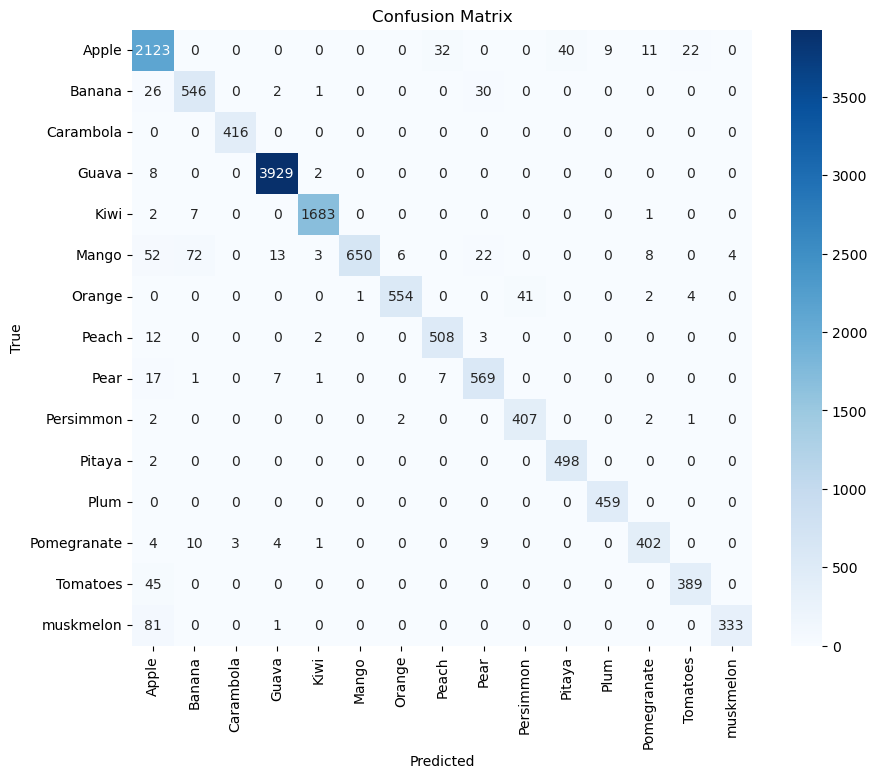

In [22]:
# Mostrar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Mostrar el reporte de clasificación
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Apple       0.89      0.95      0.92      2237
      Banana       0.86      0.90      0.88       605
   Carambola       0.99      1.00      1.00       416
       Guava       0.99      1.00      1.00      3939
        Kiwi       0.99      0.99      0.99      1693
       Mango       1.00      0.78      0.88       830
      Orange       0.99      0.92      0.95       602
       Peach       0.93      0.97      0.95       525
        Pear       0.90      0.95      0.92       602
   Persimmon       0.91      0.98      0.94       414
      Pitaya       0.93      1.00      0.96       500
        Plum       0.98      1.00      0.99       459
 Pomegranate       0.94      0.93      0.94       433
    Tomatoes       0.94      0.90      0.92       434
   muskmelon       0.99      0.80      0.89       415

    accuracy                           0.95     14104
   macro avg       0.95      0.94      0.94     14104
weig

## Prueba 6

Vemos que el modelo anterior ha mejorado un poco en su precisión, con lo cual ahora vamos a comprobar que modificando simplemente el rango del brillo (vamos a disminuir el rango) de las fotos, como la precisión va a variar para empeorarla. 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [5]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [8]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 3112s 2s/step - loss: 0.7205 - accuracy: 0.7510 - val_loss: 0.4877 - val_accuracy: 0.8317
Epoch 2/5
1764/1764 [==============================] - 1129s 640ms/step - loss: 0.2696 - accuracy: 0.9052 - val_loss: 0.2544 - val_accuracy: 0.9154
Epoch 3/5
1764/1764 [==============================] - 1108s 628ms/step - loss: 0.2075 - accuracy: 0.9292 - val_loss: 0.3121 - val_accuracy: 0.8980
Epoch 4/5
1764/1764 [==============================] - 1049s 595ms/step - loss: 0.1553 - accuracy: 0.9473 - val_loss: 0.3464 - val_accuracy: 0.8961
Epoch 5/5
1764/1764 [==============================] - 2904s 2s/step - loss: 0.1279 - accuracy: 0.9564 - val_loss: 0.1930 - val_accuracy: 0.9375


In [10]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 147s 334ms/step - loss: 0.1879 - accuracy: 0.9380
Validation accuracy: 93.80%


In [11]:
model.save('modelo_frutas_7.h5')

## Prueba 7 

Al disminuir el rango del brillo la precisión ha sido mucho peor, con lo cual volveremos a aumentar el rango y volveremos a poner la capa de Dropout.

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [13]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [15]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [16]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [18]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [19]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1020s 578ms/step - loss: 0.7135 - accuracy: 0.7533 - val_loss: 0.5027 - val_accuracy: 0.8135
Epoch 2/5
1764/1764 [==============================] - 1015s 576ms/step - loss: 0.3025 - accuracy: 0.8940 - val_loss: 0.3732 - val_accuracy: 0.8638
Epoch 3/5
1764/1764 [==============================] - 972s 551ms/step - loss: 0.2132 - accuracy: 0.9281 - val_loss: 0.2602 - val_accuracy: 0.9220
Epoch 4/5
1764/1764 [==============================] - 968s 549ms/step - loss: 0.1763 - accuracy: 0.9411 - val_loss: 0.2793 - val_accuracy: 0.9131
Epoch 5/5
1764/1764 [==============================] - 1035s 586ms/step - loss: 0.1340 - accuracy: 0.9557 - val_loss: 0.1804 - val_accuracy: 0.9410


In [20]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 145s 330ms/step - loss: 0.1887 - accuracy: 0.9368
Validation accuracy: 93.68%


In [21]:
model.save('modelo_frutas_8.h5')

## Prueba 8 

Volviendo a poner la capa de Dropout la precisión vuelve a ser baja, con lo cual decidimos quitarla, pero el rango de brillo lo dejamos con amplitud. 
Vamos a aumentar el tamaño del filtro (kernel) en las capas convolucionales a medida que avanzan las capas. Con esto vamos a comprobar que la precisión del modelo seguramente se reduzca, ya que las características de las frutas no se captarán con tanto detalle. 

Los filtros pequeños son buenos para capturar detalles finos en las imágenes, como bordes y texturas. Un filtro 3x3 tiene 9 parámetros (más un sesgo por cada filtro), lo que significa menos parámetros para entrenar y, por lo tanto, menor riesgo de sobreajuste. Filtros más pequeños requieren menos cálculo y memoria, lo que puede hacer que el entrenamiento sea más rápido.

Los filtros más grandes pueden capturar características más globales de la imagen, como formas y patrones más amplios. Un filtro 7x7 tiene 49 parámetros (más un sesgo por cada filtro), lo que significa más parámetros para entrenar y un mayor riesgo de sobreajuste si no se dispone de suficientes datos. Filtros más grandes requieren más cálculo y memoria, lo que puede hacer que el entrenamiento sea más lento.

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [23]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [25]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [26]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [28]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 128)     

In [29]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1228s 695ms/step - loss: 0.8204 - accuracy: 0.7209 - val_loss: 0.4816 - val_accuracy: 0.8344
Epoch 2/5
1764/1764 [==============================] - 1007s 571ms/step - loss: 0.3089 - accuracy: 0.8926 - val_loss: 0.3513 - val_accuracy: 0.8710
Epoch 3/5
1764/1764 [==============================] - 1111s 630ms/step - loss: 0.2311 - accuracy: 0.9208 - val_loss: 0.3928 - val_accuracy: 0.8832
Epoch 4/5
1764/1764 [==============================] - 1453s 824ms/step - loss: 0.1843 - accuracy: 0.9376 - val_loss: 0.2223 - val_accuracy: 0.9236
Epoch 5/5
1764/1764 [==============================] - 1036s 587ms/step - loss: 0.1642 - accuracy: 0.9457 - val_loss: 0.3656 - val_accuracy: 0.8961


In [30]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 156s 354ms/step - loss: 0.3553 - accuracy: 0.8961
Validation accuracy: 89.61%


In [31]:
model.save('modelo_frutas_9.h5')

## Prueba 9 

Vamos a probar de cambiar el tamaño del lote de datos. Primero los reduciremos a 16. Batch_size = 16.

#### Tamaño de Lote Pequeño (Small Batch Size):
##### Ventajas: 
Mayor variabilidad en las actualizaciones de los gradientes, lo que puede ayudar al modelo a salir de los mínimos locales y encontrar un mejor mínimo global. Puede ser útil cuando tienes un conjunto de datos limitado o cuando necesitas una mayor regularización.
##### Desventajas: 
Puede hacer que el entrenamiento sea más ruidoso y menos estable, y puede requerir más iteraciones para converger.

#### Tamaño de Lote Grande (Large Batch Size):
##### Ventajas: 
Actualizaciones de gradiente más estables y paralelismo más eficiente en hardware, lo que puede acelerar el tiempo de entrenamiento. Requiere menos iteraciones para converger.
##### Desventajas: 
Menor variabilidad en las actualizaciones de los gradientes, lo que puede llevar a quedarse atrapado en mínimos locales. Puede requerir más memoria y, en algunos casos, puede llevar a un sobreajuste si no se maneja adecuadamente. 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [4]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=16, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=16, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
3528/3528 [==============================] - 1557s 441ms/step - loss: 0.7813 - accuracy: 0.7317 - val_loss: 0.4973 - val_accuracy: 0.8313
Epoch 2/5
3528/3528 [==============================] - 1086s 308ms/step - loss: 0.3193 - accuracy: 0.8909 - val_loss: 0.3359 - val_accuracy: 0.8919
Epoch 3/5
3528/3528 [==============================] - 962s 273ms/step - loss: 0.2229 - accuracy: 0.9256 - val_loss: 0.2379 - val_accuracy: 0.9155
Epoch 4/5
3528/3528 [==============================] - 5095s 1s/step - loss: 0.1787 - accuracy: 0.9405 - val_loss: 0.2533 - val_accuracy: 0.9150
Epoch 5/5
3528/3528 [==============================] - 1337s 379ms/step - loss: 0.1509 - accuracy: 0.9499 - val_loss: 0.2166 - val_accuracy: 0.9332


In [9]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

882/882 [==============================] - 162s 184ms/step - loss: 0.2082 - accuracy: 0.9351
Validation accuracy: 93.51%


In [10]:
model.save('modelo_frutas_10.h5')

## Prueba 10 

Volvemos a cambiar el tamaño del lote. Esta vez lo aumentamos a 64. Batch_size = 64.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=64, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=64,
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [8]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
882/882 [==============================] - 1583s 2s/step - loss: 0.9520 - accuracy: 0.6775 - val_loss: 0.5516 - val_accuracy: 0.8053
Epoch 2/5
882/882 [==============================] - 1349s 2s/step - loss: 0.3292 - accuracy: 0.8835 - val_loss: 0.3190 - val_accuracy: 0.8831
Epoch 3/5
882/882 [==============================] - 1040s 1s/step - loss: 0.2092 - accuracy: 0.9267 - val_loss: 0.2677 - val_accuracy: 0.9109
Epoch 4/5
882/882 [==============================] - 993s 1s/step - loss: 0.1669 - accuracy: 0.9419 - val_loss: 0.2026 - val_accuracy: 0.9296
Epoch 5/5
882/882 [==============================] - 945s 1s/step - loss: 0.1329 - accuracy: 0.9536 - val_loss: 0.1723 - val_accuracy: 0.9411


In [10]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

221/221 [==============================] - 213s 965ms/step - loss: 0.1755 - accuracy: 0.9422
Validation accuracy: 94.22%


In [11]:
model.save('modelo_frutas_11.h5')

## Prueba 11

Después de haber entrenado todos los modelos con Data Augmentation, decidimos probar con las imágenes lo más originales posibles. Solo utilizamos el parámetro de brightness_range, porque consideramos que es imprescindible, ya que sabemos de primera mano que las imágenes tienen diferente brillo. 

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    brightness_range=[0.5, 1.5]
) 

In [21]:
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [22]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [24]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [25]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1322s 749ms/step - loss: 0.4826 - accuracy: 0.8388 - val_loss: 0.2793 - val_accuracy: 0.9272
Epoch 2/5
1764/1764 [==============================] - 938s 532ms/step - loss: 0.1250 - accuracy: 0.9579 - val_loss: 0.3255 - val_accuracy: 0.9122
Epoch 3/5
1764/1764 [==============================] - 811s 460ms/step - loss: 0.0805 - accuracy: 0.9728 - val_loss: 0.2797 - val_accuracy: 0.9438
Epoch 4/5
1764/1764 [==============================] - 689s 390ms/step - loss: 0.0581 - accuracy: 0.9808 - val_loss: 0.2569 - val_accuracy: 0.9443
Epoch 5/5
1764/1764 [==============================] - 711s 403ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.2544 - val_accuracy: 0.9482


In [26]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 74s 167ms/step - loss: 0.2555 - accuracy: 0.9483
Validation accuracy: 94.83%


In [27]:
model.save('modelo_frutas12.h5')

## Prueba 12

Se coge el modelo que mas precisión hemos obtenido hasta ahora y se comprueba su rendimiento con una nueva función de activación, la de 'tanh' en las capas de convolución. 

#### Tanh (Tangente Hiperbólica):
- La salida está centrada en cero, lo que puede ayudar a que el modelo converja más rápido que con la función sigmoid.
- Similar a sigmoid, introduce no linealidad, permitiendo que el modelo aprenda patrones complejos.
-  A veces se usa en capas convolucionales, especialmente cuando se desea que las salidas estén centradas en cero. Aunque también sufre de desvanecimiento del gradiente, es menos severo que en sigmoid.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [3]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [6]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1468s 832ms/step - loss: 1.0660 - accuracy: 0.6476 - val_loss: 0.6327 - val_accuracy: 0.7808
Epoch 2/5
1764/1764 [==============================] - 1254s 711ms/step - loss: 0.5483 - accuracy: 0.8156 - val_loss: 0.4027 - val_accuracy: 0.8751
Epoch 3/5
1764/1764 [==============================] - 1103s 625ms/step - loss: 0.4598 - accuracy: 0.8482 - val_loss: 0.4101 - val_accuracy: 0.8625
Epoch 4/5
1764/1764 [==============================] - 1024s 580ms/step - loss: 0.4259 - accuracy: 0.8626 - val_loss: 0.3692 - val_accuracy: 0.8870
Epoch 5/5
1764/1764 [==============================] - 1154s 654ms/step - loss: 0.3952 - accuracy: 0.8740 - val_loss: 0.4056 - val_accuracy: 0.8687


In [8]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 179s 407ms/step - loss: 0.4142 - accuracy: 0.8639
Validation accuracy: 86.39%


In [ ]:
model.save('modelo_frutas13.h5')

## Prueba 13

Se coge el modelo que más precisión hemos obtenido hasta ahora y esta vez añadimos como padding 'same'.

El padding es una técnica utilizada en las redes neuronales convolucionales (CNN) para controlar el tamaño de la salida de una capa convolucional en relación con la entrada. Se refiere a la adición de píxeles adicionales (generalmente con valor cero) alrededor de los bordes de una imagen antes de aplicar una operación convolucional. 

#### Same Padding (padding='same'):
- Se añade padding para que la salida tenga el mismo tamaño espacial (ancho y alto) que la entrada.
- La cantidad de padding depende del tamaño del filtro y se calcula para asegurar que la salida tenga dimensiones iguales a la entrada.
- Puede ayudar a preservar la información contenida en los bordes de la imagen, que de otra manera podría perderse en las primeras capas convolucionales.

Por defecto, si no añadimos padding utiliza el 'valid'.

#### Valid Padding (padding='valid'):
- No se añade padding a la entrada.
- La operación convolucional se realiza solo en las posiciones donde el filtro convolucional cabe completamente dentro de la entrada.
- Esto reduce el tamaño espacial (ancho y alto) de la salida.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

# ImageDataGenerator de Keras nos ayuda a cargar, preprocesar y aumentar (augment) las imágenes de manera eficiente.

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,  # Disminuir la rotación a 30 grados
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5], #rango de brillo aleatorio, si el valor es 1 no varia el brillo
    fill_mode='nearest',  
    validation_split=0.2
)

In [3]:
# Crear generadores de datos
train_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'training'  # Usamos el conjuntos de datos de entrenamiento
)

Found 56445 images belonging to 15 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical',
    subset = 'validation'  # Usamos el conjuntos de datos de validación
)

Found 14104 images belonging to 15 classes.


In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping si es necesario
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [6]:
# from tensorflow.keras import layers
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [7]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Continuar entrenando el modelo 
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1764/1764 [==============================] - 1778s 1s/step - loss: 0.8301 - accuracy: 0.7128 - val_loss: 0.3934 - val_accuracy: 0.8571
Epoch 2/5
1764/1764 [==============================] - 1663s 942ms/step - loss: 0.2903 - accuracy: 0.8984 - val_loss: 0.2853 - val_accuracy: 0.9010
Epoch 3/5
1764/1764 [==============================] - 1492s 846ms/step - loss: 0.1822 - accuracy: 0.9372 - val_loss: 0.1788 - val_accuracy: 0.9355
Epoch 4/5
1764/1764 [==============================] - 1143s 648ms/step - loss: 0.1448 - accuracy: 0.9519 - val_loss: 0.1812 - val_accuracy: 0.9378
Epoch 5/5
1764/1764 [==============================] - 1088s 617ms/step - loss: 0.1206 - accuracy: 0.9600 - val_loss: 0.1831 - val_accuracy: 0.9400


In [8]:
# Después del entrenamiento, evaluamos el modelo con los datos de validación para verificar su precisión y rendimiento general.

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

441/441 [==============================] - 155s 351ms/step - loss: 0.1915 - accuracy: 0.9409
Validation accuracy: 94.09%


In [9]:
model.save('modelo_frutas_14.h5')

## Resumen para el estudio de la red neuronal convolucional

### Prueba 1
Con todas las imágenes con Data Augmentation, como primer modelo tenemos: 

Validation accuracy: 94.16%


### Prueba 2

Aumentamos el modelo anterior 5 epochs más. 

Validation accuracy: 93.99%

### Prueba 3

Aumentamos los valores del Data Augmentation y añadimos la capa de Dropout. 

Validation accuracy: 91.04%

### Prueba 4

Añadimos nuevos parámetros al Data Augmentation, y volvemos a disminuir el valor de los parámetros.

Validation accuracy: 95.08%

### Prueba 5

Se ajusta el rango del brillo a uno amplio, se cambia el número de filtros de la capa convolucional y quitamos una capa Dropout. 

Validation accuracy: 95.31%

### Prueba 6

Disminuimos el rango del brillo y comprobamos que empeora la precisión. 

Validation accuracy: 93.80%

### Prueba 7

Se vuelve a poner un rango amplio de brillo y en este caso dejamos las dos capas de Dropout. 

Validation accuracy: 93.68%

### Prueba 8

Volvemos a dejar solo una capa de Dropout, y aumentaremos el tamaño del filtro en las capas convolucionales a medida que avanza. Comprobamos que con filtros grandes perdemos detalles de las características y el modelo tiene peor precisión. 

Validation accuracy: 89.61%

### Prueba 9

Cambiamos el tamaño de los lotes de imágenes. Primero reducimos el tamaño a 16.

Validation accuracy: 93.51%

### Prueba 10 

Cambiamos el tamaño de los lotes de imágenes. Esta vez el tamaño es 64. 

Validation accuracy: 94.22%

### Prueba 11

Probamos de entrenar el modelo simplemente con el parámetro brightness_range, para tener las imágenes más originales posibles. 

Validation accuracy: 94.83%

### Prueba 12

Con el modelo que más precisión hemos tenido, le cambiamos la función de activación en las capas de convolución a 'tanh'.

Validation accuracy: 86,39%

### Prueba 13

Con el modelo que más precisión hemos tenido, le añadimos padding 'same' en las capas de convolución. 

Validation accuracy: 94,09%

# Modelo KNN (K-Nearest Neighbors) con VGG16

Para probar un modelo KNN (K-Nearest Neighbors) con imágenes, necesitamos extraer características de estas, ya que KNN no puede trabajar directamente con datos en formato de imagen cruda. Podemos usar una red neuronal preentrenada (por ejemplo, VGG16) para extraer estas características y luego aplicar el modelo KNN sobre las características extraídas.

#### VGG16: 
Es una de las arquitecturas de redes neuronales convolucionales (CNN) más conocidas y utilizadas. La red se destaca por su simplicidad y eficacia, y ha sido preentrenada en el conjunto de datos ImageNet, que contiene millones de imágenes clasificadas en miles de categorías.

VGG16 tiene 16 capas de peso, de ahí su nombre (13 capas de convolución y 3 capas completamente conectadas). 
Su arquitectura se puede resumir de la siguiente manera:

- 13 capas de convolución con filtros de tamaño 3x3.
- 5 capas de max-pooling.
- 3 capas completamente conectadas al final.
- Funciones de activación Relu en todas las capas ocultas.
- Una capa de softmax al final para la clasificación.

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Directorio de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    brightness_range=[0.5, 1.5]
) 

In [20]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'training'
)

Found 56445 images belonging to 15 classes.


In [21]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 14104 images belonging to 15 classes.


In [22]:
# Cargamos el modelo VGG16 preentrenado sin las capas superiores
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Utilizamos el modelo VGG16 preentrenado y descartamos las capas superiores (las capas completamente conectadas y la capa de softmax) utilizando el parámetro 'include_top=False'. Esto significa que solo estamos utilizando las capas convolucionales y de max-pooling de VGG16 para extraer características.

Pasamos nuestras imágenes a través de la parte convolucional de VGG16 para obtener un conjunto de características (también llamadas "features"). Las características extraídas son representaciones más abstractas y útiles de las imágenes originales, que capturan patrones y estructuras importantes.

In [23]:
# Extraemos características de las imágenes de entrenamiento
train_features = vgg_model.predict(train_generator)
train_labels = train_generator.classes

1764/1764 [==============================] - 2970s 2s/step


In [24]:
# Extraemos características de las imágenes de validación
validation_features = vgg_model.predict(validation_generator)
validation_labels = validation_generator.classes

441/441 [==============================] - 606s 1s/step


In [25]:
# Aplanamos las características para que puedan ser usadas por KNN
train_features_flat = np.reshape(train_features, (train_features.shape[0], -1))
validation_features_flat = np.reshape(validation_features, (validation_features.shape[0], -1))

In [29]:
# Entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features_flat, train_labels)

KNeighborsClassifier()

#### n_neighbors=5:
Especifica el número de vecinos más cercanos que se deben considerar para la clasificación de una nueva muestra. Un valor bajo (por ejemplo, 1 o 3) hace que el modelo sea más sensible a las muestras ruidosas y al sobreajuste. Esto ocurre porque solo un pequeño número de vecinos determina la clasificación, lo que puede llevar a decisiones erráticas si hay puntos de entrenamiento ruidosos. Mientras que un valor grande puede hacer que el modelo se vuelva demasiado general.

In [30]:
# Predecimos las etiquetas de las imágenes de validación
validation_predictions = knn.predict(validation_features_flat)

In [31]:
# Calculamos la precisión del modelo
val_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

Validation accuracy: 82.23%


In [32]:
# Guardamos el modelo KNN en un archivo
joblib.dump(knn, 'D:/knn_model.pkl')
print("Modelo KNN guardado como 'knn_model.pkl'")

Modelo KNN guardado como 'knn_model.pkl'


In [3]:
# Cargar el modelo
knn_loaded = joblib.load('D:/knn_model.pkl')

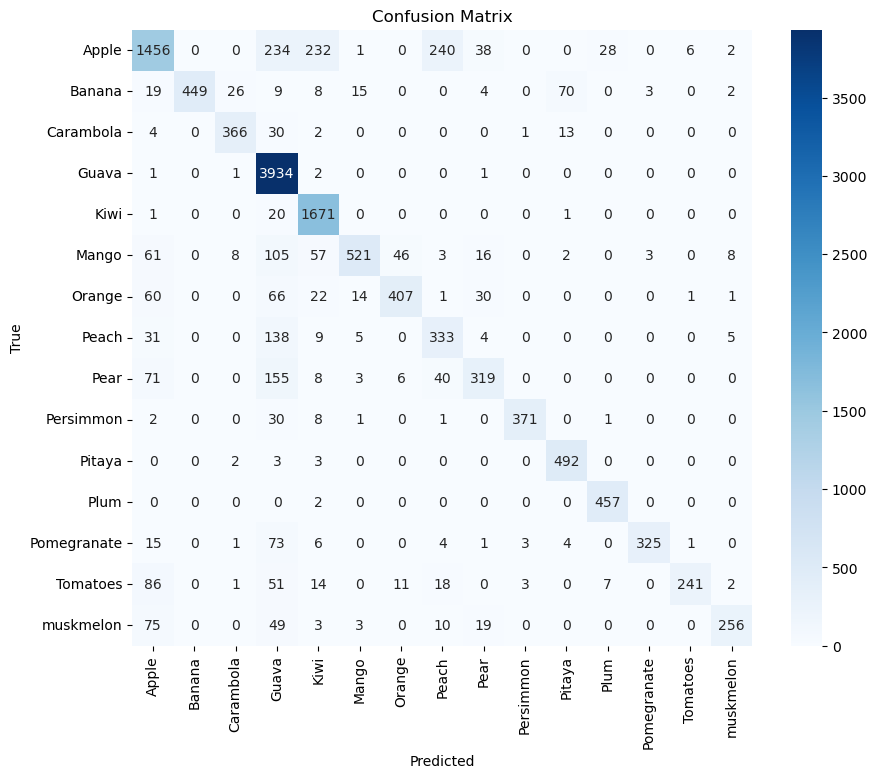

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(validation_labels, validation_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Mostramos el reporte de clasificación
print('Classification Report')
print(classification_report(validation_labels, validation_predictions, target_names=train_generator.class_indices.keys()))

Classification Report
              precision    recall  f1-score   support

       Apple       0.77      0.65      0.71      2237
      Banana       1.00      0.74      0.85       605
   Carambola       0.90      0.88      0.89       416
       Guava       0.80      1.00      0.89      3939
        Kiwi       0.82      0.99      0.89      1693
       Mango       0.93      0.63      0.75       830
      Orange       0.87      0.68      0.76       602
       Peach       0.51      0.63      0.57       525
        Pear       0.74      0.53      0.62       602
   Persimmon       0.98      0.90      0.94       414
      Pitaya       0.85      0.98      0.91       500
        Plum       0.93      1.00      0.96       459
 Pomegranate       0.98      0.75      0.85       433
    Tomatoes       0.97      0.56      0.71       434
   muskmelon       0.93      0.62      0.74       415

    accuracy                           0.82     14104
   macro avg       0.86      0.77      0.80     14104
weig

# Support Vector Machine (SVM) con VGG16

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Directorio de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    brightness_range=[0.5, 1.5]
)

In [3]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='training'
)

Found 56445 images belonging to 15 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 14104 images belonging to 15 classes.


In [5]:
# Cargamos el modelo VGG16 preentrenado sin las capas superiores
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [6]:
# Extraemos características de las imágenes de entrenamiento
train_features = vgg_model.predict(train_generator)
train_labels = train_generator.classes

1764/1764 [==============================] - 2680s 2s/step


In [7]:
# Extraemos características de las imágenes de validación
validation_features = vgg_model.predict(validation_generator)
validation_labels = validation_generator.classes

441/441 [==============================] - 624s 1s/step


In [8]:
# Aplanamos las características para que puedan ser usadas por SVM
train_features_flat = np.reshape(train_features, (train_features.shape[0], -1))
validation_features_flat = np.reshape(validation_features, (validation_features.shape[0], -1))

In [9]:
# Entrenamos el modelo SVM
svm = SVC(kernel='linear')
svm.fit(train_features_flat, train_labels)

SVC(kernel='linear')

#### kernel='linear':
Especifica que se debe utilizar un núcleo lineal. Esto significa que el SVM intentará encontrar un hiperplano lineal que separe las clases en el espacio de características. Es una buena elección cuando los datos son linealmente separables y cuando se busca un modelo más simple y rápido de entrenar e interpretar. 

In [10]:
# Guardamos el modelo SVM
joblib.dump(svm, 'svm_model.pkl')
print("Modelo SVM guardado como 'svm_model.pkl'")

Modelo SVM guardado como 'svm_model.pkl'


In [11]:
# Predecimos las etiquetas de las imágenes de validación
validation_predictions = svm.predict(validation_features_flat)

In [12]:
# Calculamos la precisión del modelo
val_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

Validation accuracy: 95.32%


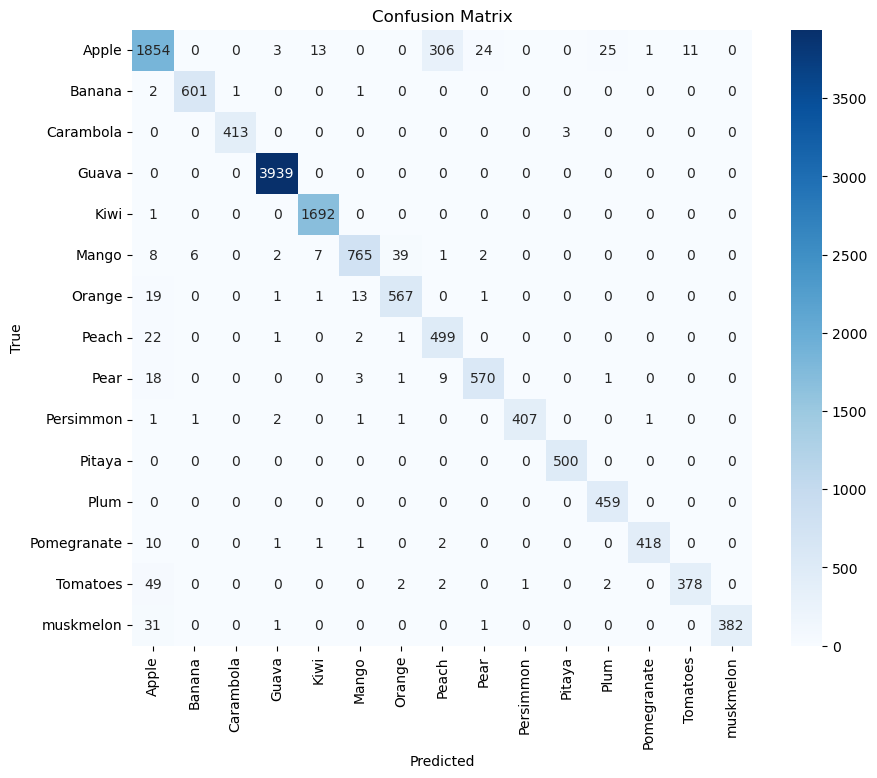

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generamos y mostramos la matriz de confusión
conf_matrix = confusion_matrix(validation_labels, validation_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Mostramos el reporte de clasificación
print('Classification Report')
print(classification_report(validation_labels, validation_predictions, target_names=train_generator.class_indices.keys()))

Classification Report
              precision    recall  f1-score   support

       Apple       0.92      0.83      0.87      2237
      Banana       0.99      0.99      0.99       605
   Carambola       1.00      0.99      1.00       416
       Guava       1.00      1.00      1.00      3939
        Kiwi       0.99      1.00      0.99      1693
       Mango       0.97      0.92      0.95       830
      Orange       0.93      0.94      0.93       602
       Peach       0.61      0.95      0.74       525
        Pear       0.95      0.95      0.95       602
   Persimmon       1.00      0.98      0.99       414
      Pitaya       0.99      1.00      1.00       500
        Plum       0.94      1.00      0.97       459
 Pomegranate       1.00      0.97      0.98       433
    Tomatoes       0.97      0.87      0.92       434
   muskmelon       1.00      0.92      0.96       415

    accuracy                           0.95     14104
   macro avg       0.95      0.95      0.95     14104
weig

# Random Forest

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Directorio de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

In [15]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    brightness_range=[0.5, 1.5]
)

In [16]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='training'
)

Found 56445 images belonging to 15 classes.


In [17]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 14104 images belonging to 15 classes.


In [18]:
# Cargamos el modelo VGG16 preentrenado sin las capas superiores
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [19]:
# Extraemos características de las imágenes de entrenamiento
train_features = vgg_model.predict(train_generator)
train_labels = train_generator.classes

1764/1764 [==============================] - 2424s 1s/step


In [21]:
# Extraemos características de las imágenes de validación
validation_features = vgg_model.predict(validation_generator)
validation_labels = validation_generator.classes

441/441 [==============================] - 546s 1s/step


In [22]:
# Aplanamos las características para que puedan ser usadas por Random Forest
train_features_flat = np.reshape(train_features, (train_features.shape[0], -1))
validation_features_flat = np.reshape(validation_features, (validation_features.shape[0], -1))

In [23]:
# Entrenamos el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features_flat, train_labels)

RandomForestClassifier(random_state=42)

##### random_state=42:
Este parámetro fija la semilla para el generador de números aleatorios utilizado por el algoritmo. Al fijar la semilla, se pueden controlar los aspectos aleatorios del entrenamiento, como el muestreo de datos para cada árbol y la selección de características.

In [24]:
# Guardamos el modelo Random Forest
joblib.dump(rf, 'rf_model.pkl')
print("Modelo Random Forest guardado como 'rf_model.pkl'")

Modelo Random Forest guardado como 'rf_model.pkl'


In [25]:
# Predecimos las etiquetas de las imágenes de validación
validation_predictions = rf.predict(validation_features_flat)

In [26]:
# Calculamos la precisión del modelo
val_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

Validation accuracy: 79.56%


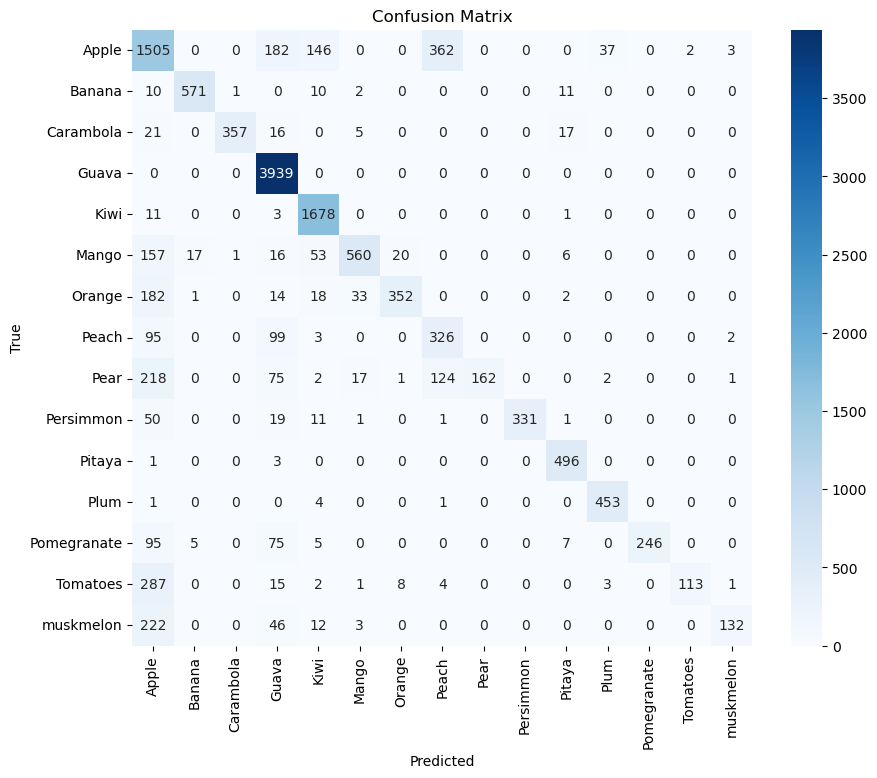

In [27]:
# Generamos y mostramos la matriz de confusión
conf_matrix = confusion_matrix(validation_labels, validation_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Mostramos el reporte de clasificación
print('Classification Report')
print(classification_report(validation_labels, validation_predictions, target_names=train_generator.class_indices.keys()))

Classification Report
              precision    recall  f1-score   support

       Apple       0.53      0.67      0.59      2237
      Banana       0.96      0.94      0.95       605
   Carambola       0.99      0.86      0.92       416
       Guava       0.87      1.00      0.93      3939
        Kiwi       0.86      0.99      0.92      1693
       Mango       0.90      0.67      0.77       830
      Orange       0.92      0.58      0.72       602
       Peach       0.40      0.62      0.49       525
        Pear       1.00      0.27      0.42       602
   Persimmon       1.00      0.80      0.89       414
      Pitaya       0.92      0.99      0.95       500
        Plum       0.92      0.99      0.95       459
 Pomegranate       1.00      0.57      0.72       433
    Tomatoes       0.98      0.26      0.41       434
   muskmelon       0.95      0.32      0.48       415

    accuracy                           0.80     14104
   macro avg       0.88      0.70      0.74     14104
weig

# LightGBM (Light Gradient Boosting Machine)

LightGBM implementa técnicas de boosting basadas en árboles de decisión. 

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorio de los datos de entrenamiento y validación
base_dir = 'C:/Users/Elis/Documents/Master_pontia/Proyecto_Jupiter/fotos_frutas'

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    brightness_range=[0.5, 1.5]
)

In [3]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='training'
)

Found 56445 images belonging to 15 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 14104 images belonging to 15 classes.


In [5]:
# Cargamos el modelo VGG16 preentrenado sin las capas superiores
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [6]:
# Extraemos características de las imágenes de entrenamiento
train_features = vgg_model.predict(train_generator)
train_labels = train_generator.classes

1764/1764 [==============================] - 3018s 2s/step


In [7]:
# Extraemos características de las imágenes de validación
validation_features = vgg_model.predict(validation_generator)
validation_labels = validation_generator.classes

441/441 [==============================] - 608s 1s/step


In [8]:
# Aplanamos las características para que puedan ser usadas por Gradient Boosting
train_features_flat = np.reshape(train_features, (train_features.shape[0], -1))
validation_features_flat = np.reshape(validation_features, (validation_features.shape[0], -1))

In [9]:
# Entrenamos el modelo LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=-1, learning_rate=0.1, num_leaves=31)
lgb_model.fit(train_features_flat, train_labels)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.969544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1813442
[LightGBM] [Info] Number of data points in the train set: 56445, number of used features: 7962
[LightGBM] [Info] Start training from score -1.841837
[LightGBM] [Info] Start training from score -3.148673
[LightGBM] [Info] Start training from score -3.524042
[LightGBM] [Info] Start training from score -1.275855
[LightGBM] [Info] Start training from score -2.120470
[LightGBM] [Info] Start training from score -2.832098
[LightGBM] [Info] Start training from score -3.153640
[LightGBM] [Info] Start training from score -3.289426
[LightGBM] [Info] Start training from score -3.153640
[LightGBM] [Info] Start training from score -3.527655
[LightGBM] [Info] Start training from score -3.339620
[LightGBM] [Info] Start training from score -3.424045
[LightGBM] [Info] Start training from score -3.482836
[Lig

LGBMClassifier()

##### n_estimators=100:
Especifica el número de árboles en el modelo de boosting.

##### max_depth=-1:
Define la profundidad máxima de cada árbol. Un valor de -1 significa que no hay límite en la profundidad del árbol. Un valor de -1 permite a los árboles crecer hasta que todas las hojas son puras.

##### learning_rate=0.1:
También conocido como tasa de aprendizaje, este parámetro reduce el peso de cada árbol contribuido a la predicción final.

##### num_leaves=31:
Especifica el número máximo de hojas en cada árbol. Cada hoja contiene una predicción final. En el caso de este problema de clasificación, una hoja representa una clase.

In [20]:
import joblib

# Guardamos el modelo LightGBM
joblib.dump(lgb_model, 'lgb_model.pkl')
print("Modelo LightGBM guardado como 'lgb_model.pkl'")

Modelo Gradient Boosting guardado como 'lgb_model.pkl'


In [12]:
# Predecimos y evaluamos
y_pred = lgb_model.predict(validation_features_flat)
accuracy = accuracy_score(validation_labels, y_pred)
conf_matrix = confusion_matrix(validation_labels, y_pred)

In [13]:
print(f"Validation accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Validation accuracy: 90.87%
Confusion Matrix:
[[1785    0    0   11   17    0    0  403    3    0    0    7    1   10
     0]
 [   4  596    3    0    0    0    0    0    0    0    2    0    0    0
     0]
 [   2    0  400    0    0    1    0    0    0    0   13    0    0    0
     0]
 [   0    0    0 3939    0    0    0    0    0    0    0    0    0    0
     0]
 [   5    0    0    0 1688    0    0    0    0    0    0    0    0    0
     0]
 [  28   10    0    8    7  726   40    1    6    0    1    0    3    0
     0]
 [  65    0    0    2    2   24  508    0    1    0    0    0    0    0
     0]
 [  48    0    0    2    1    2    3  465    2    0    0    0    1    1
     0]
 [  90    0    0    9    0   12    0   51  440    0    0    0    0    0
     0]
 [   2    0    0    5    2    1    7    0    0  397    0    0    0    0
     0]
 [   0    1    0    0    2    0    0    0    0    0  497    0    0    0
     0]
 [   3    0    0    0    2    0    0    4    0    0    0  450    0    0
  

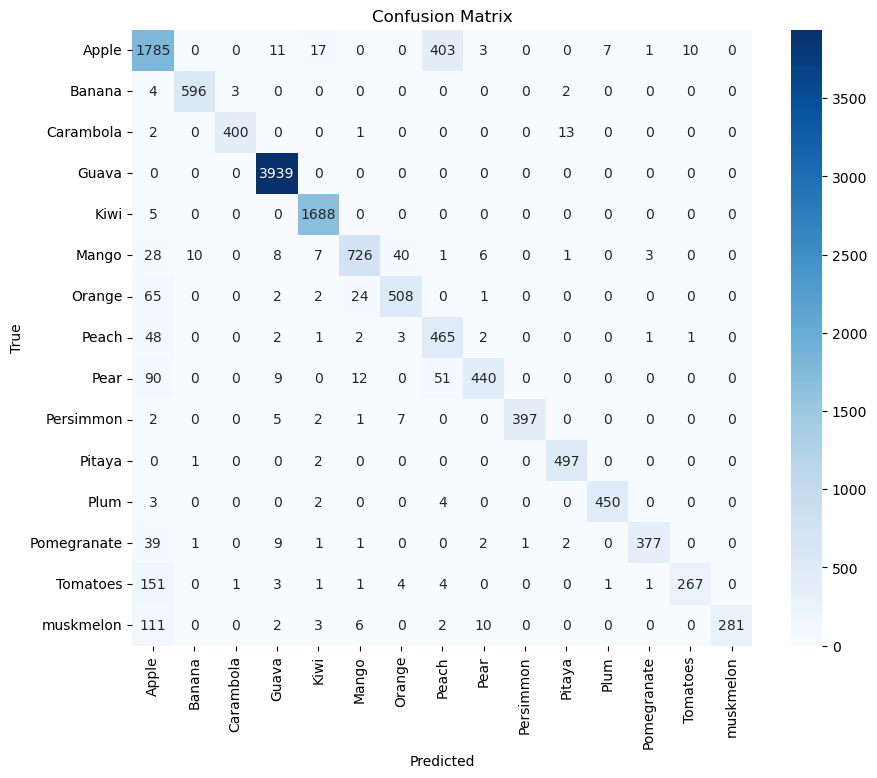

In [14]:
# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Mostramos el classification report
class_report = classification_report(validation_labels, y_pred, target_names=list(train_generator.class_indices.keys()))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       Apple       0.77      0.80      0.78      2237
      Banana       0.98      0.99      0.98       605
   Carambola       0.99      0.96      0.98       416
       Guava       0.99      1.00      0.99      3939
        Kiwi       0.98      1.00      0.99      1693
       Mango       0.94      0.87      0.91       830
      Orange       0.90      0.84      0.87       602
       Peach       0.50      0.89      0.64       525
        Pear       0.95      0.73      0.83       602
   Persimmon       1.00      0.96      0.98       414
      Pitaya       0.97      0.99      0.98       500
        Plum       0.98      0.98      0.98       459
 Pomegranate       0.98      0.87      0.92       433
    Tomatoes       0.96      0.62      0.75       434
   muskmelon       1.00      0.68      0.81       415

    accuracy                           0.91     14104
   macro avg       0.93      0.88      0.89     14104
wei

## Resumen modelos con preentrenamiento con VGG16

### KNN (K-Nearest Neighbors)

Este modelo alcanzó una precisión de 82,23%. KNN es sensible a la escala y distribución de los datos, lo que puede haber afectado su precisión en comparación con modelos más sofisticados.

### SVM (Suport vector machine)

Este modelo obtuvo una precisión de 95,32%. SVM es muy efectivo en espacios de alta dimensionalidad, lo que puede explicar su alto rendimiento utilizando las características de VGG16. Maximiza el margen de separación entre las clases, lo que puede conducir a una mejor generalización en los datos de prueba.

### Random Forest

Este modulo obtuvo una precisión de 79,56%. Random Forest es robusto al sobreajuste y suele tener un buen desempeño en diferentes conjuntos de datos debido a su naturaleza de ensemble. Puede proporcionar información sobre la importancia de las características, lo que puede ser útil para la interpretación del modelo, pero puede no ser tan efectivo como SVM o LightGBM para la clasificación de imágenes complejas.

### LightGBM

Este modelo obtuvo una precisión de 90,87%. LightGBM es conocido por su alta velocidad de entrenamiento y eficiencia en el manejo de grandes conjuntos de datos. La precisión alta sugiere una buena capacidad de generalización, probablemente debido a su forma de manejar las interacciones entre características. Es altamente escalable y puede manejar grandes volúmenes de datos con eficiencia, lo que lo hace ideal para aplicaciones que requieren procesamiento rápido y eficiente.

# Conclusiones

Hemos obtenido un modelo de red neuronal convolucional con un accuracy de 95,31% y un modelo SVM con preentrenamiento con VGG16 con un accuracy del 95,32%. Ambos modelos tienen una precisión muy similar, con lo cual vamos a hacer una breve comparación para poder decidirnos. 

#### Red neuronal convolucional (CNN)
##### Ventajas
- Las CNN's están específicamente diseñadas para trabajar con datos de imágenes, extrayendo características espaciales y jerárquicas de manera más eficiente que los métodos tradicionales.
- Pueden aprender características directamente de las imágenes crudas sin necesidad de un preprocesamiento extenso, a diferencia del SVM que requiere características preextraídas (como las de VGG16).
- Pueden escalar bien con datos adicionales y pueden beneficiarse de técnicas avanzadas como el aprendizaje transferido y la adaptación de dominio.

##### Desventajas

- Las CNN's Pueden ser más complejas y requieren más recursos computacionales para entrenar.
- Entrenar una CNN desde cero o incluso ajustar un modelo preentrenado puede ser más lento comparado con entrenar un SVM con características preextraídas.
  
#### SVM 
##### Ventajas 
- Una vez que las características han sido extraídas, el SVM puede ser más rápido y eficiente en términos computacionales tanto en el entrenamiento como en la inferencia.
- El SVM es conceptualmente más sencillo de entender y de implementar, especialmente con conjuntos de datos de tamaño moderado.
- SVM es menos propenso a sobreajuste en comparación con las redes neuronales más profundas si se ajustan correctamente los parámetros.

##### Desventajas 
- El SVM depende de características preextraídas (como las de VGG16), lo que puede limitar su capacidad para capturar características más complejas y jerárquicas que una CNN puede aprender directamente.
- El SVM puede no escalar tan bien con datasets muy grandes en comparación con CNNs optimizadas para grandes volúmenes de datos.

Tenemos dos opciones: 

- ##### Elegir ambos modelos:
Puede ser beneficioso implementar ambos modelos en paralelo para aprovechar sus fortalezas combinadas. Por ejemplo, podríamos usar un enfoque de ensemble donde ambos modelos contribuyen a la decisión final, aumentando potencialmente la robustez del sistema.

- ##### Elegir un modelo:
En este caso como para nosotros la flexibilidad y la capacidad de capturar características complejas son claves escogeríamos la red neuronal convolucional. La empresa tendrá acceso a recursos computacionales adecuados y puede planear expandir el dataset en un futuro. 


## Posibles mejoras

Se podría utilizar dentro de la técnica de aprendizaje transferido (Transfer Learning), el Fine-Tuning(Ajuste fino) para la red neuronal convolucional. 
El aprendizaje transferido se refiere a la técnica de reutilizar un modelo preentrenado en un conjunto de datos grande y genérico y adaptarlo para una tarea específica en un dominio diferente pero relacionado. Como hemos realizado con el VGG16 preentrenando antes. 

#### Fine-Tuning (Ajuste Fino):
- Ajustar los pesos del modelo preentrenado en el nuevo conjunto de datos específico.
- Requiere más datos y recursos computacionales, pero puede llevar a un mejor rendimiento al adaptar todas las capas del modelo al nuevo dominio.